In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_7916\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Path to Dataset

In [2]:
# Path to dataset
metadata_dir = os.path.join( "..", "metadata" )
assert os.path.exists( metadata_dir ), f"Can't find {metadata_dir}, please check 'metadata_dir'..."

#
dataset_name = "Comp_LIDC-SB"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( metadata_dir, "new_split_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})
samples_df["source"] = samples_df.apply( lambda r: "Comp_LIDC-SB" if (r["source"] in ["LIDC-IDRI", "Stony Brook"]) else r["source"], axis = 1)

samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT


## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

,patient_id,source,class,country,sex,age,partition,slice_selection,verified_finding,view,modality,sample_count
0,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,Yes,Axial,CT,121
1,NCP_270,CNCB,COVID-19,China,N/A,N/A,val,Expert,Yes,Axial,CT,124
2,NCP_322,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,40
3,NCP_1276,CNCB,COVID-19,China,N/A,N/A,test,Expert,Yes,Axial,CT,32
4,NCP_2683,CNCB,COVID-19,China,N/A,N/A,test,Expert,Yes,Axial,CT,9


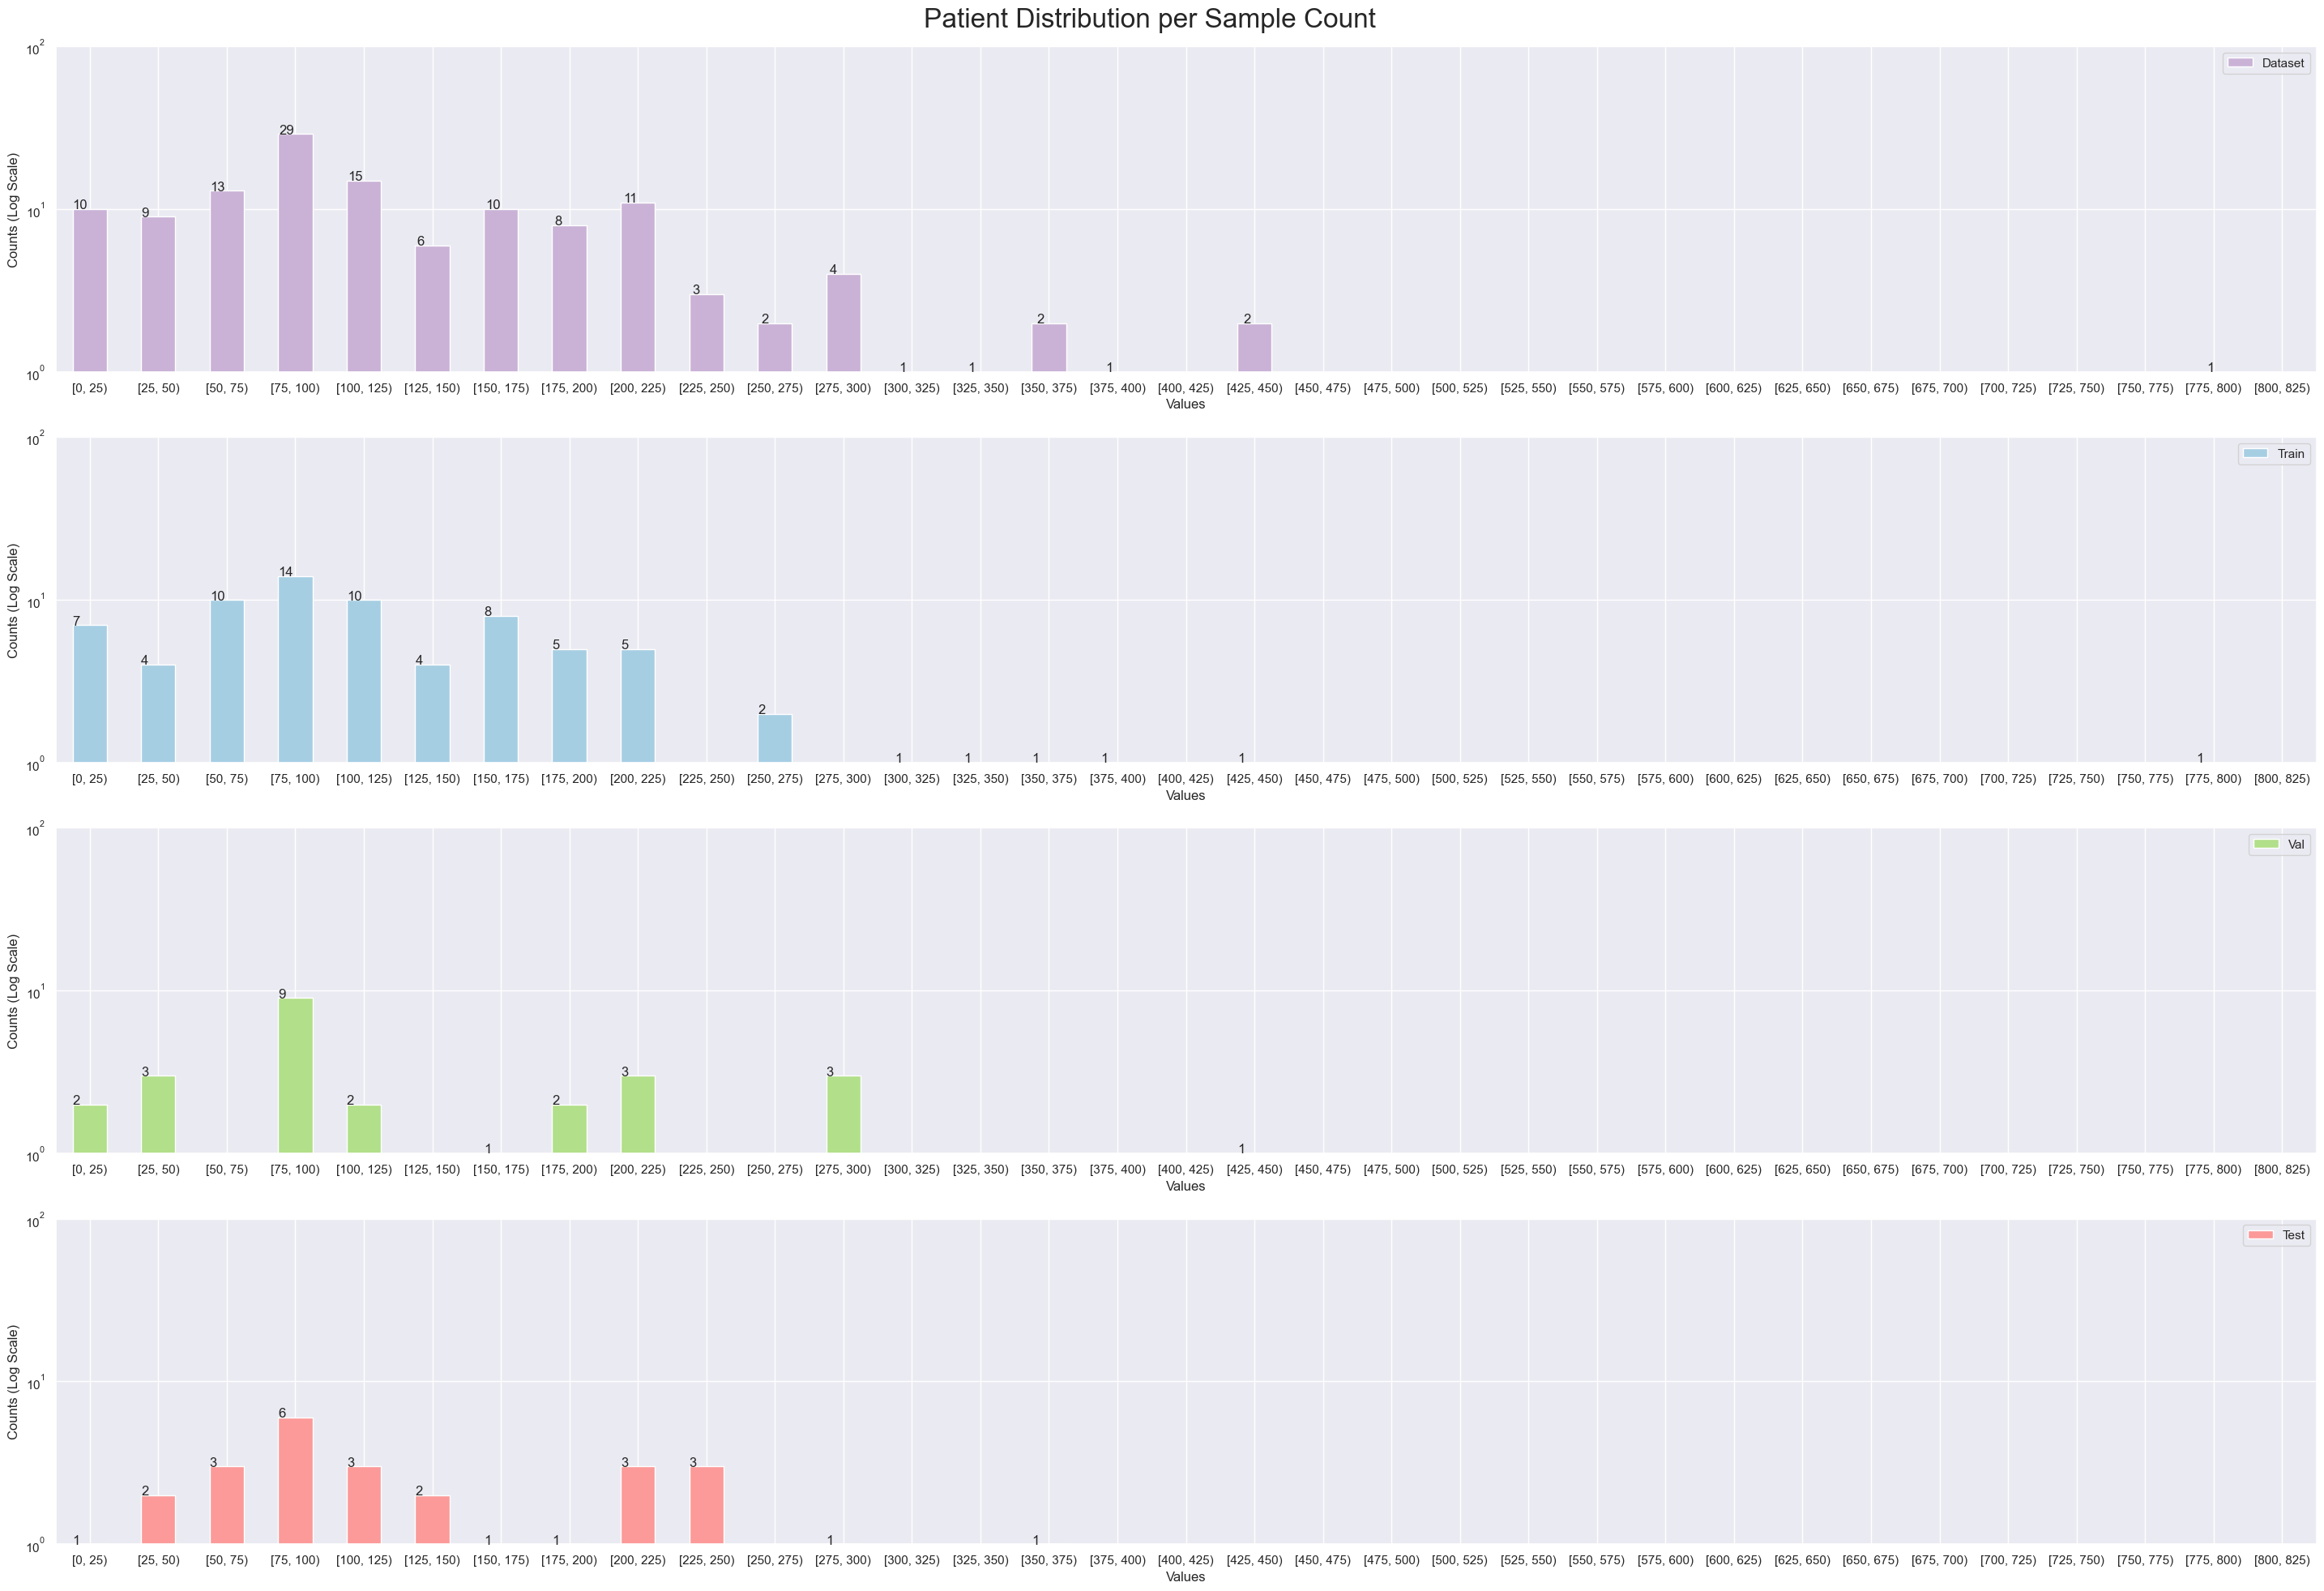

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

,Dataset,Train,Val,Test
Values,,,,
"[0, 25)",10,7,2,1
"[25, 50)",9,4,3,2
"[50, 75)",13,10,0,3
"[75, 100)",29,14,9,6
"[100, 125)",15,10,2,3
"[125, 150)",6,4,0,2
"[150, 175)",10,8,1,1
"[175, 200)",8,5,2,1
"[200, 225)",11,5,3,3


# Plots

## Class

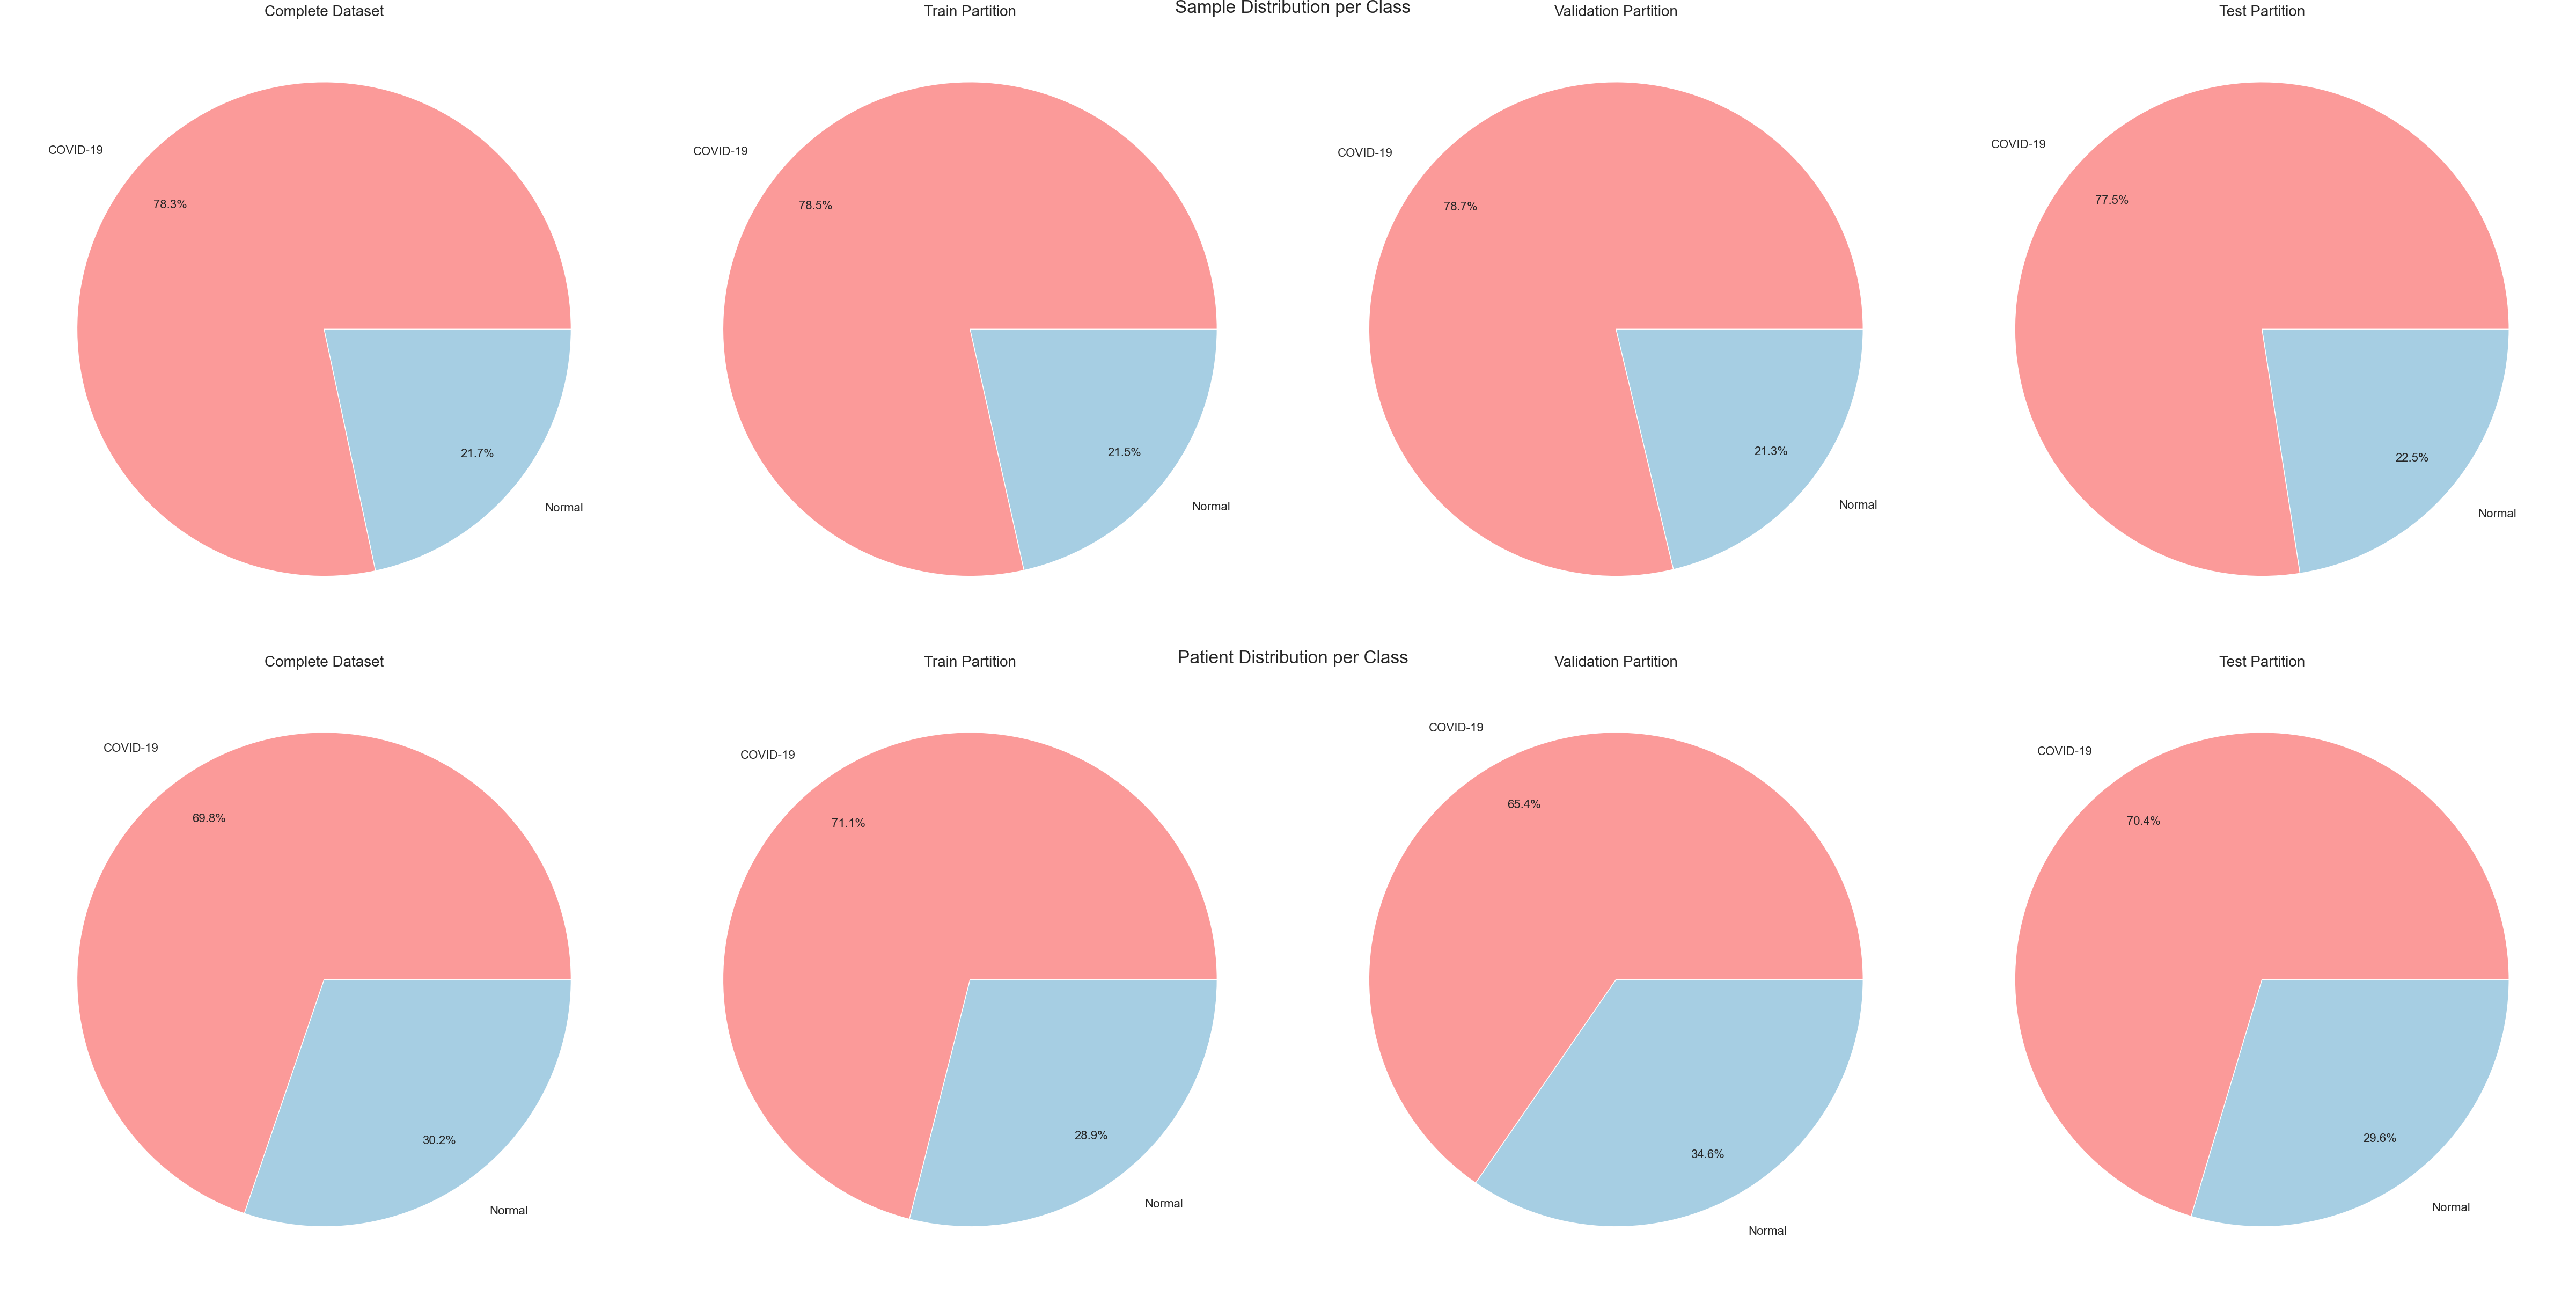

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,14461,8691,2880,2890
Normal,3999,2380,778,841
Pneumonia,0,0,0,0
SUM,18460,11071,3658,3731
,Dataset,Train,Val,Test
Values,,,,
COVID-19,90,54,17,19
Pneumonia,0,0,0,0
Normal,39,22,9,8


## Age

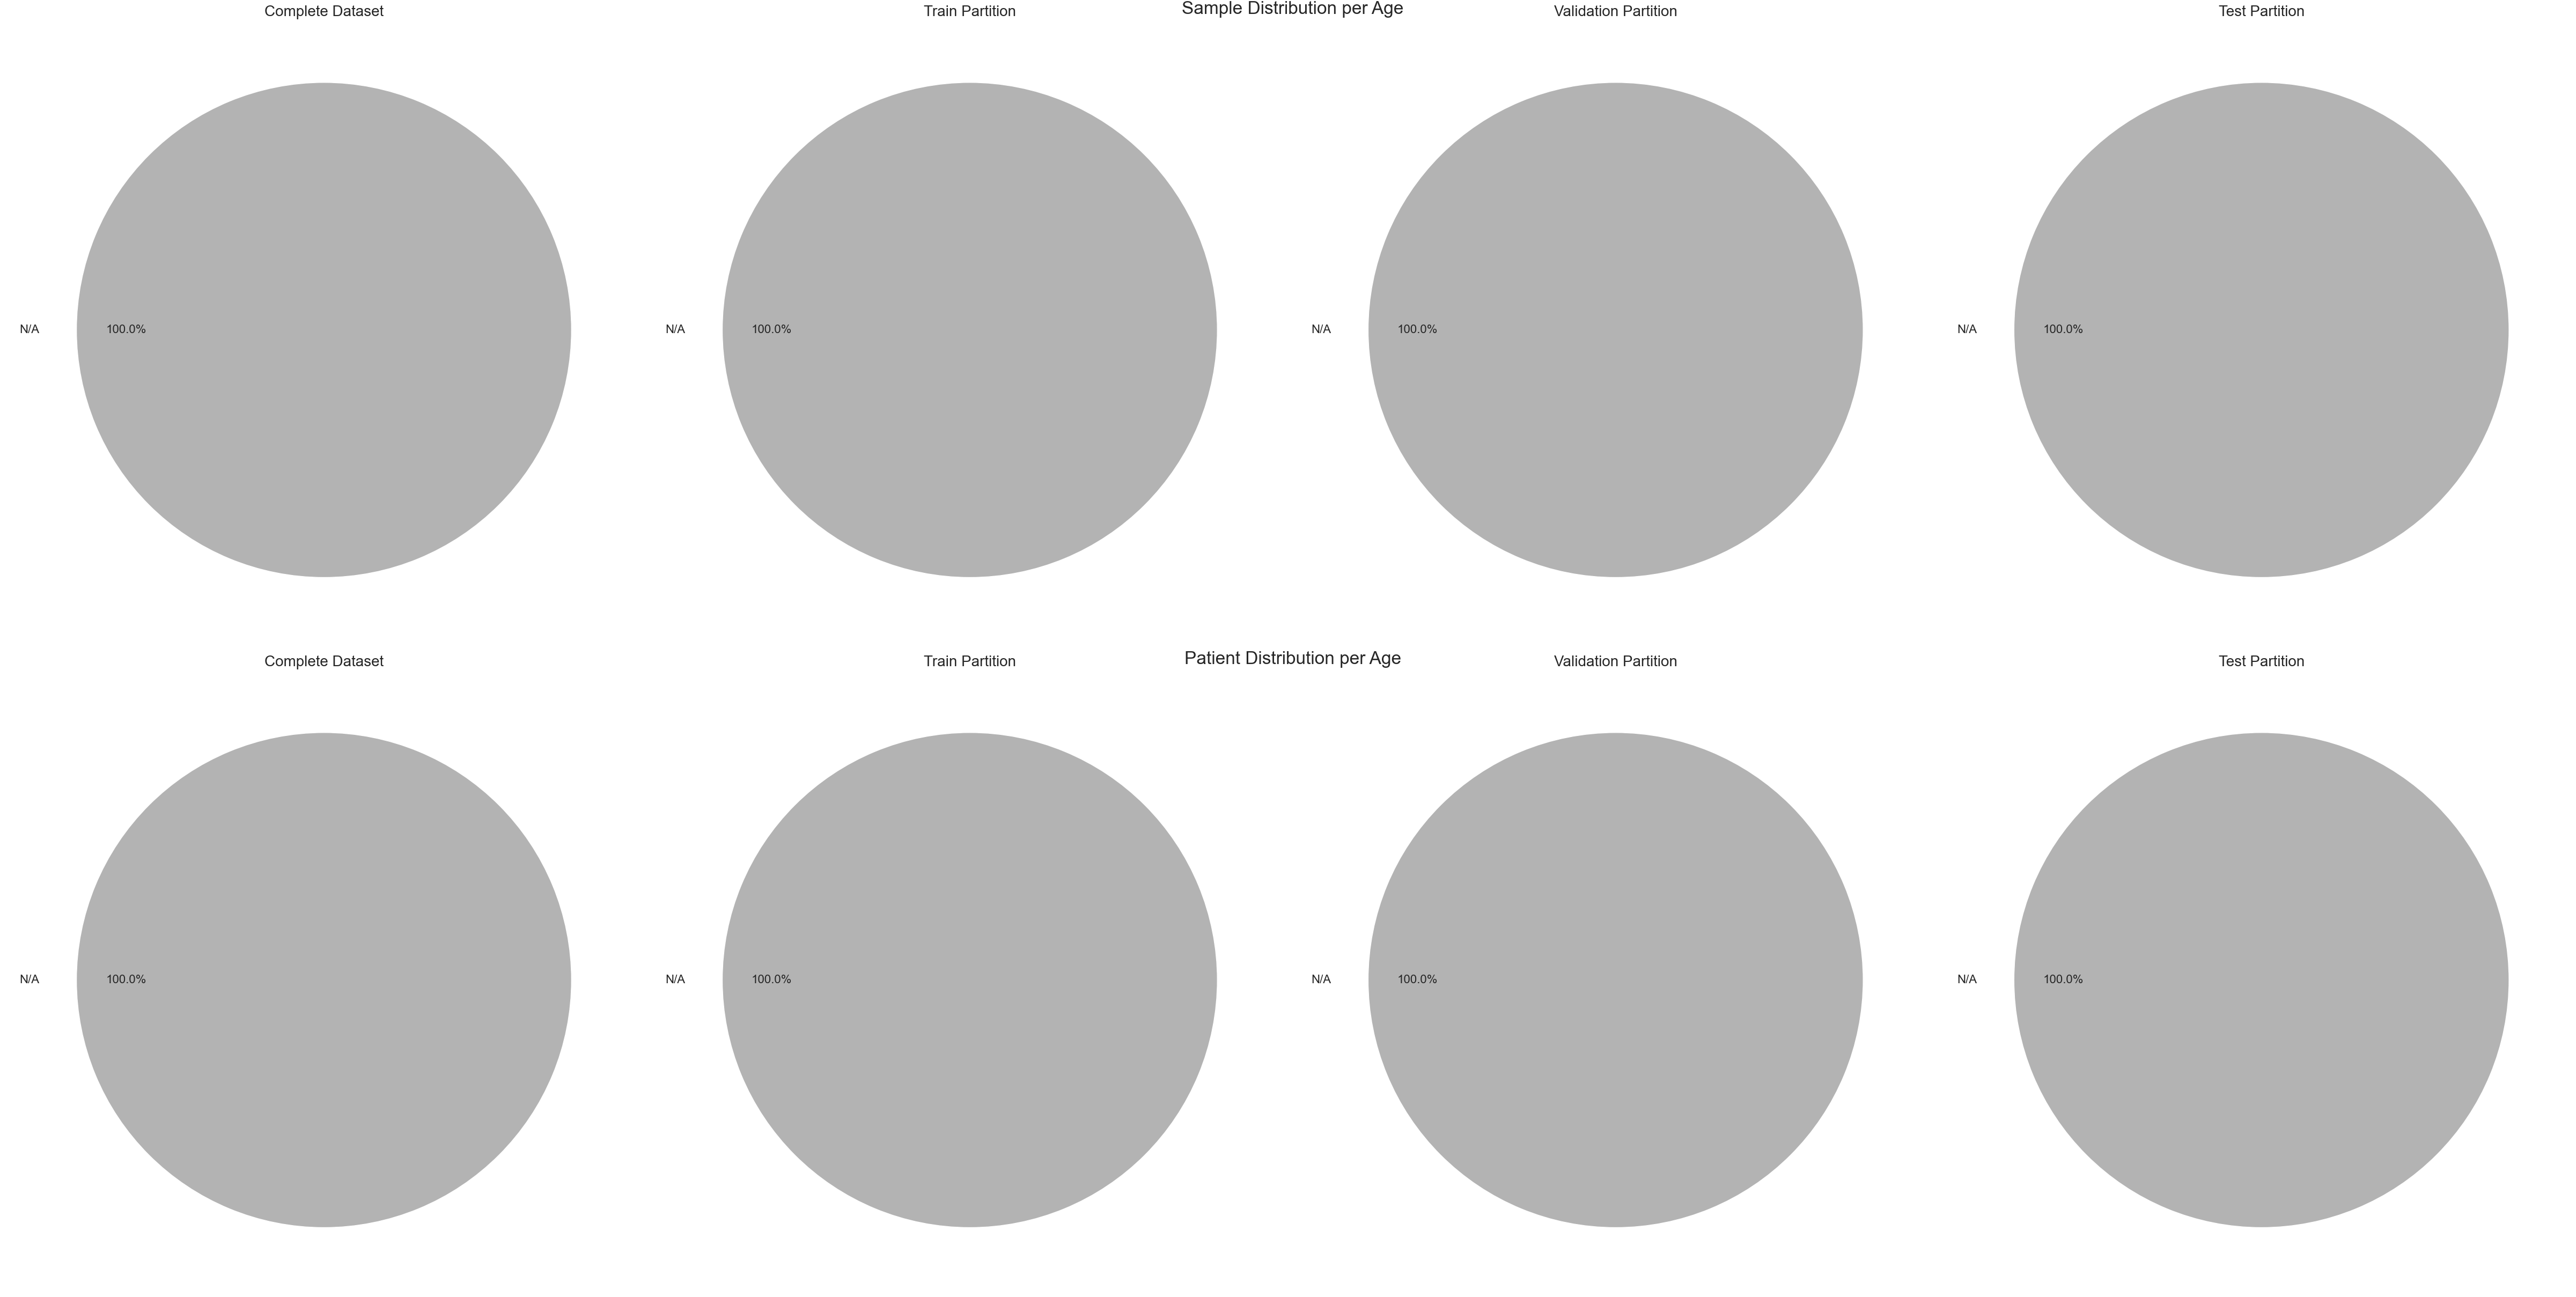

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,18460,11071,3658,3731
Known Ages,0,0,0,0
SUM,18460,11071,3658,3731
,Dataset,Train,Val,Test
Values,,,,
N/A,129,76,26,27
Known Ages,0,0,0,0
SUM,129,76,26,27


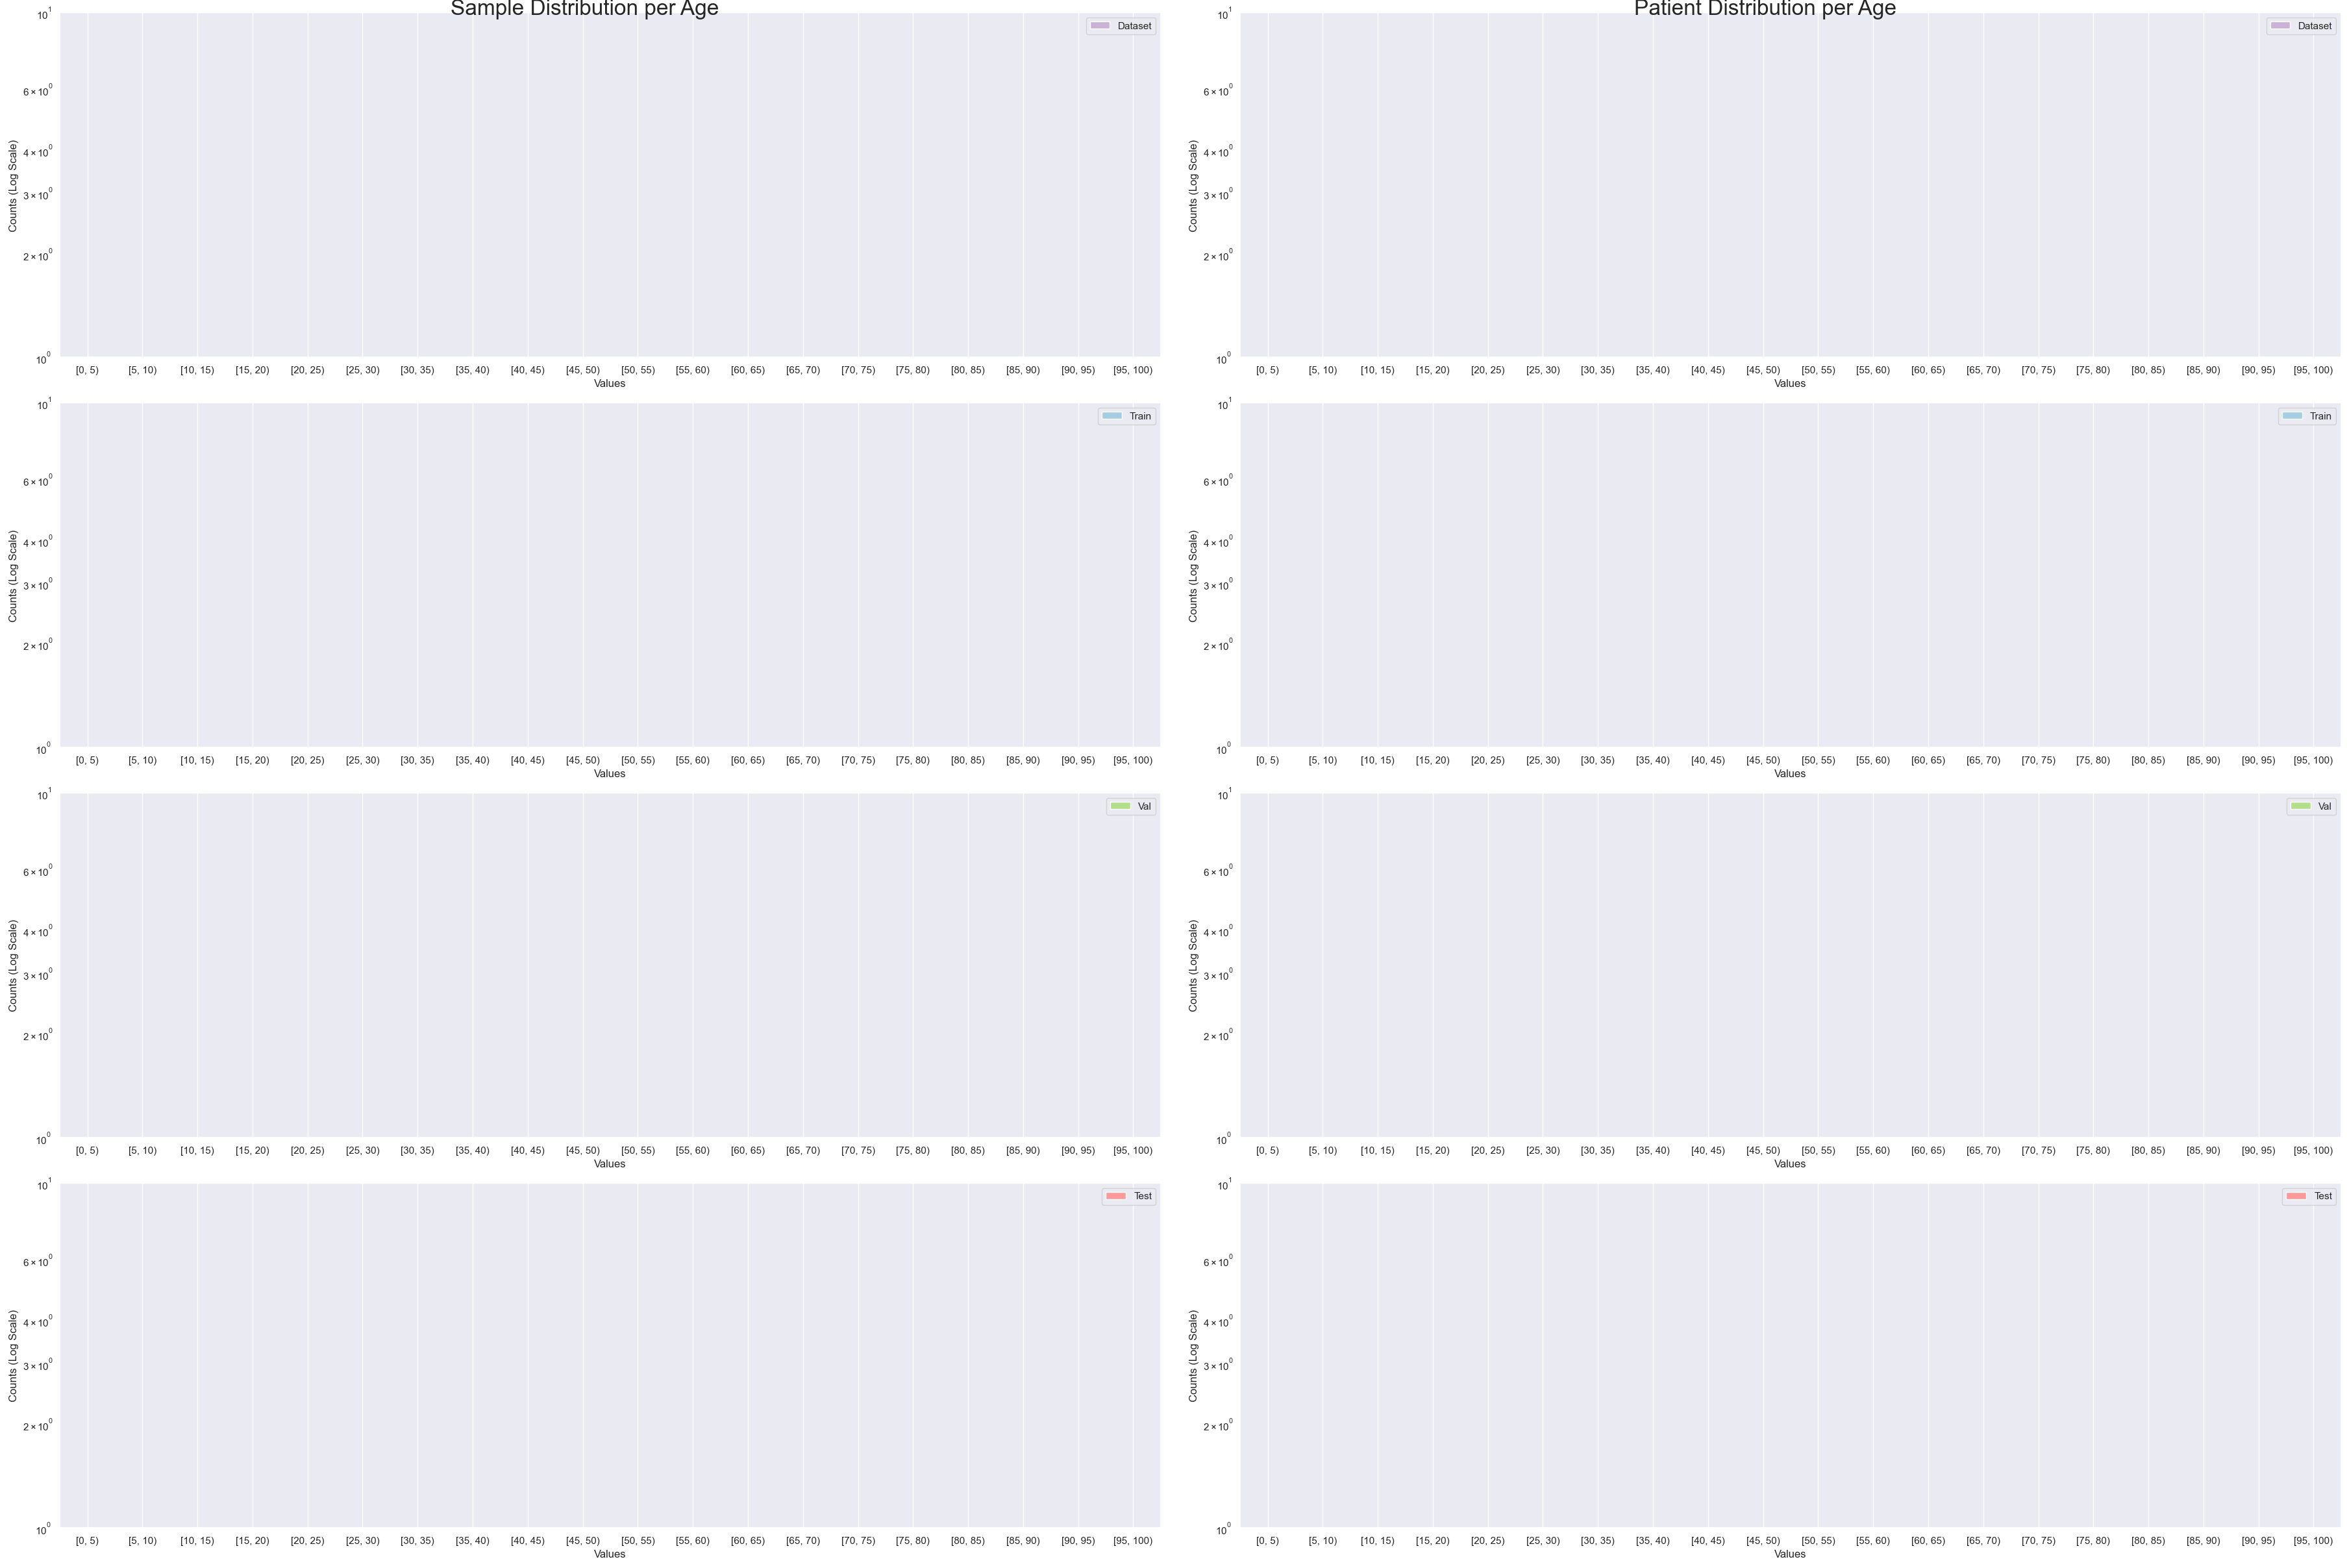

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",0,0,0,0
"[5, 10)",0,0,0,0
"[10, 15)",0,0,0,0
"[15, 20)",0,0,0,0
"[20, 25)",0,0,0,0
"[25, 30)",0,0,0,0
"[30, 35)",0,0,0,0
"[35, 40)",0,0,0,0
"[40, 45)",0,0,0,0


## Sex

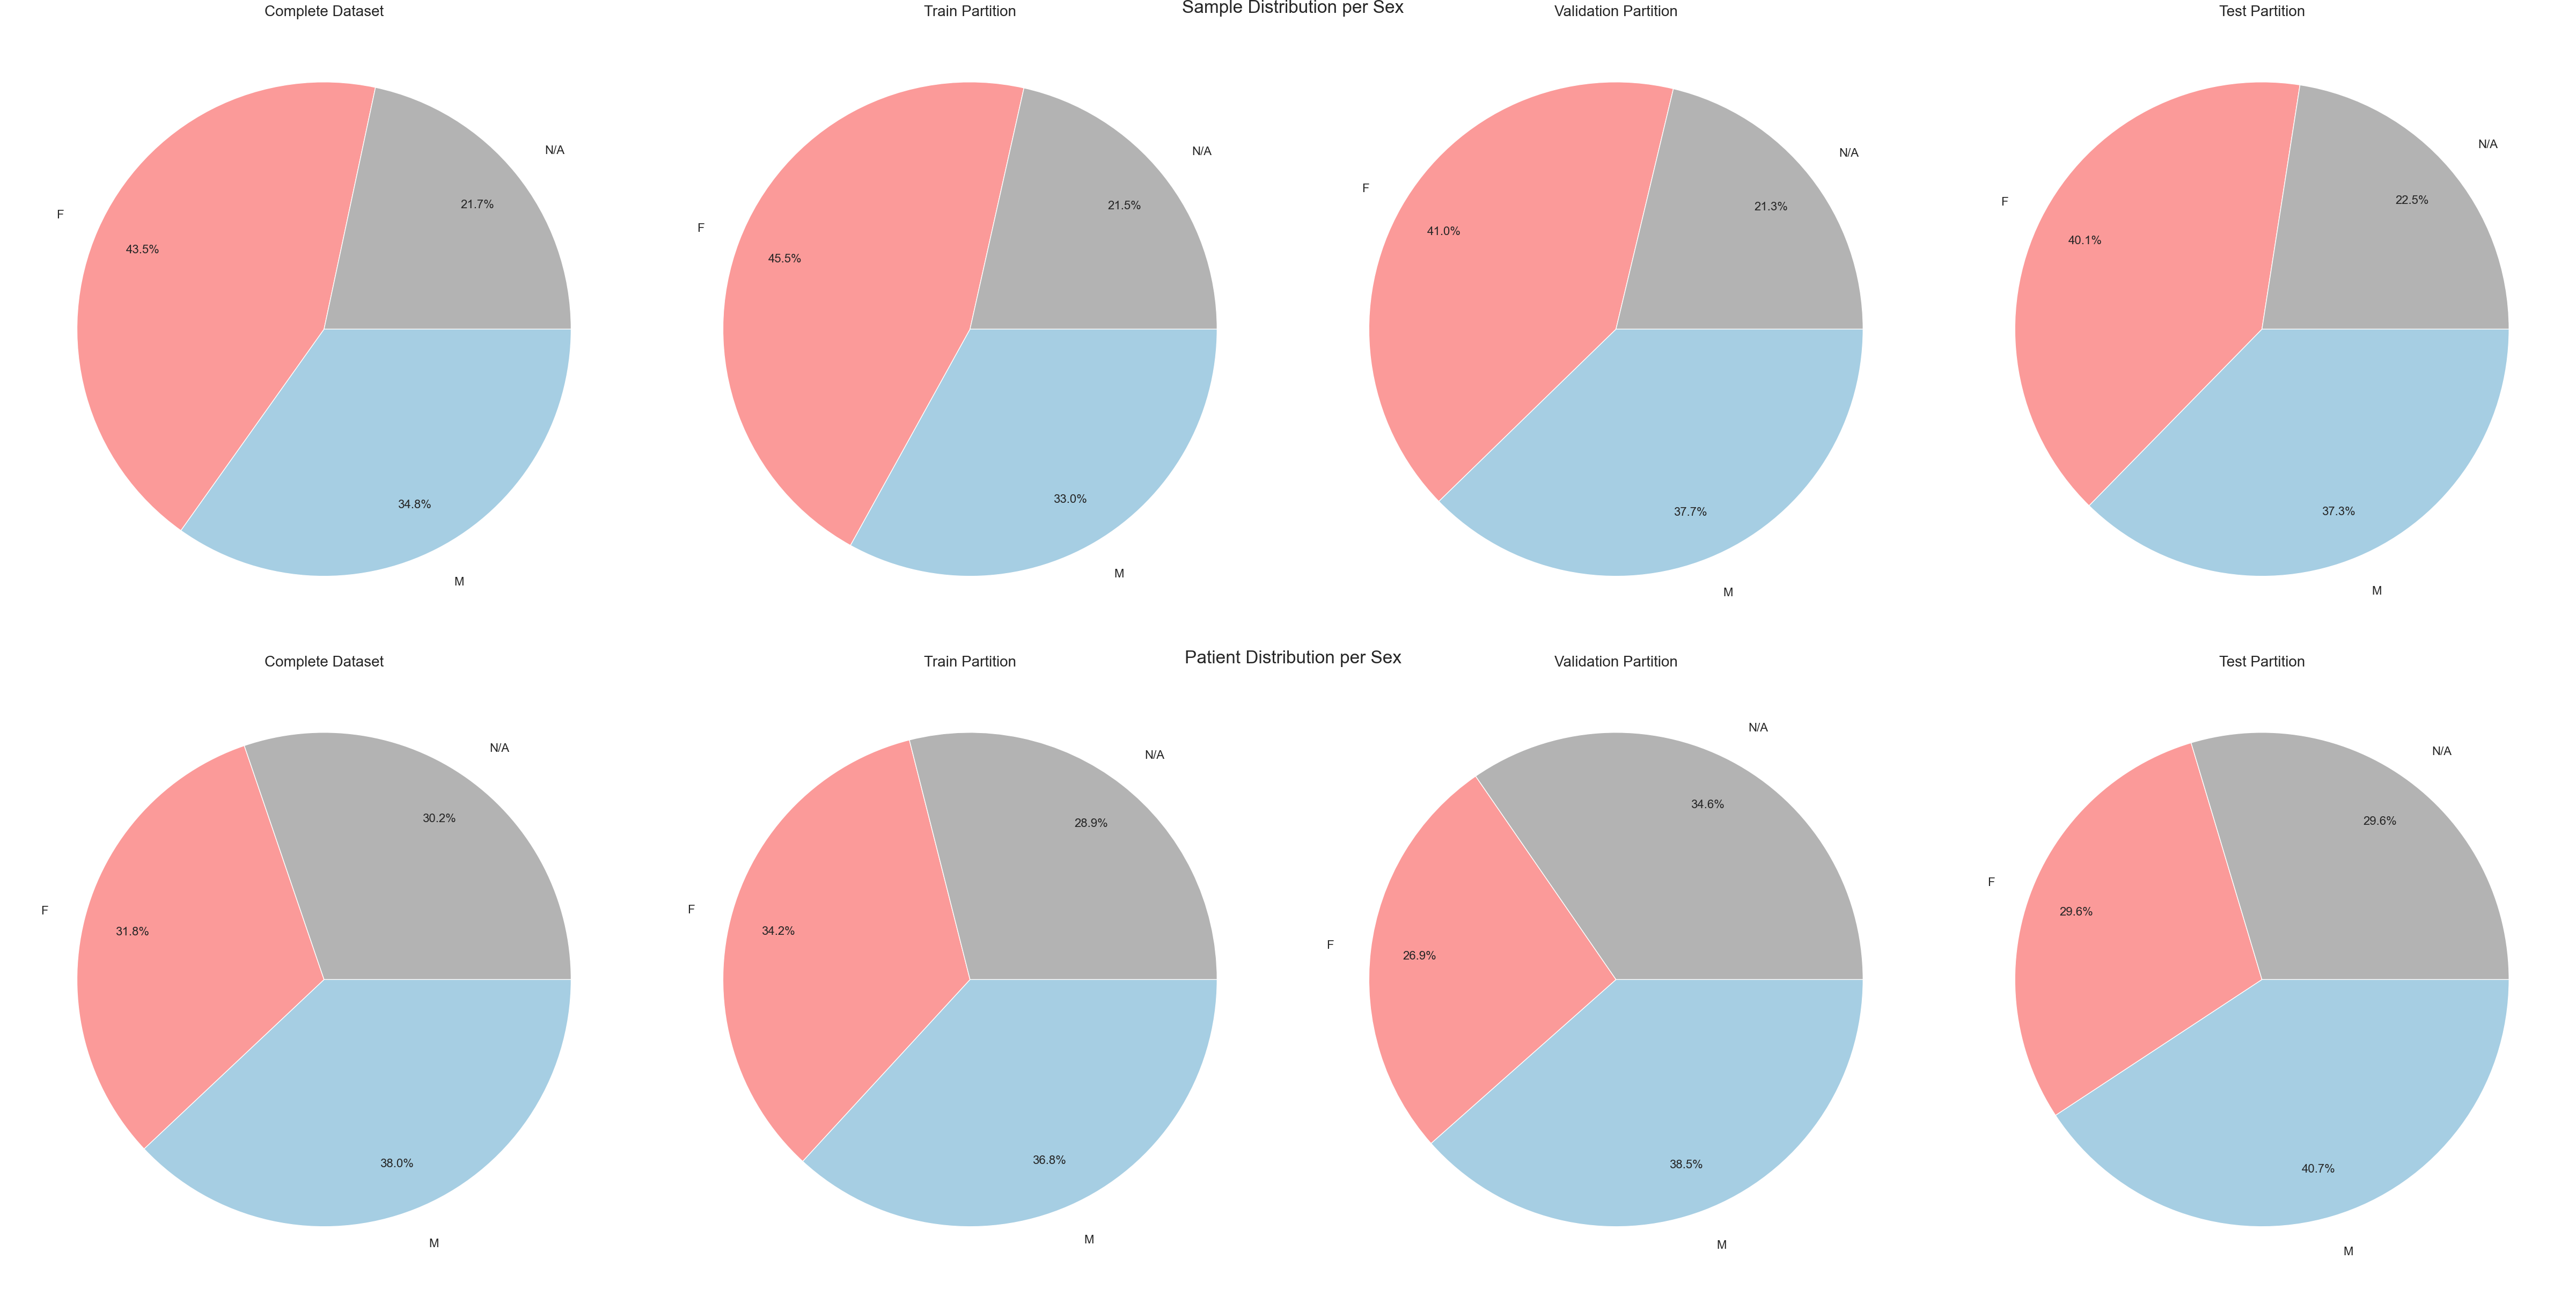

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
M,6431,3658,1380,1393
N/A,3999,2380,778,841
F,8030,5033,1500,1497
SUM,18460,11071,3658,3731
,Dataset,Train,Val,Test
Values,,,,
N/A,39,22,9,8
M,49,28,10,11
F,41,26,7,8


## Country

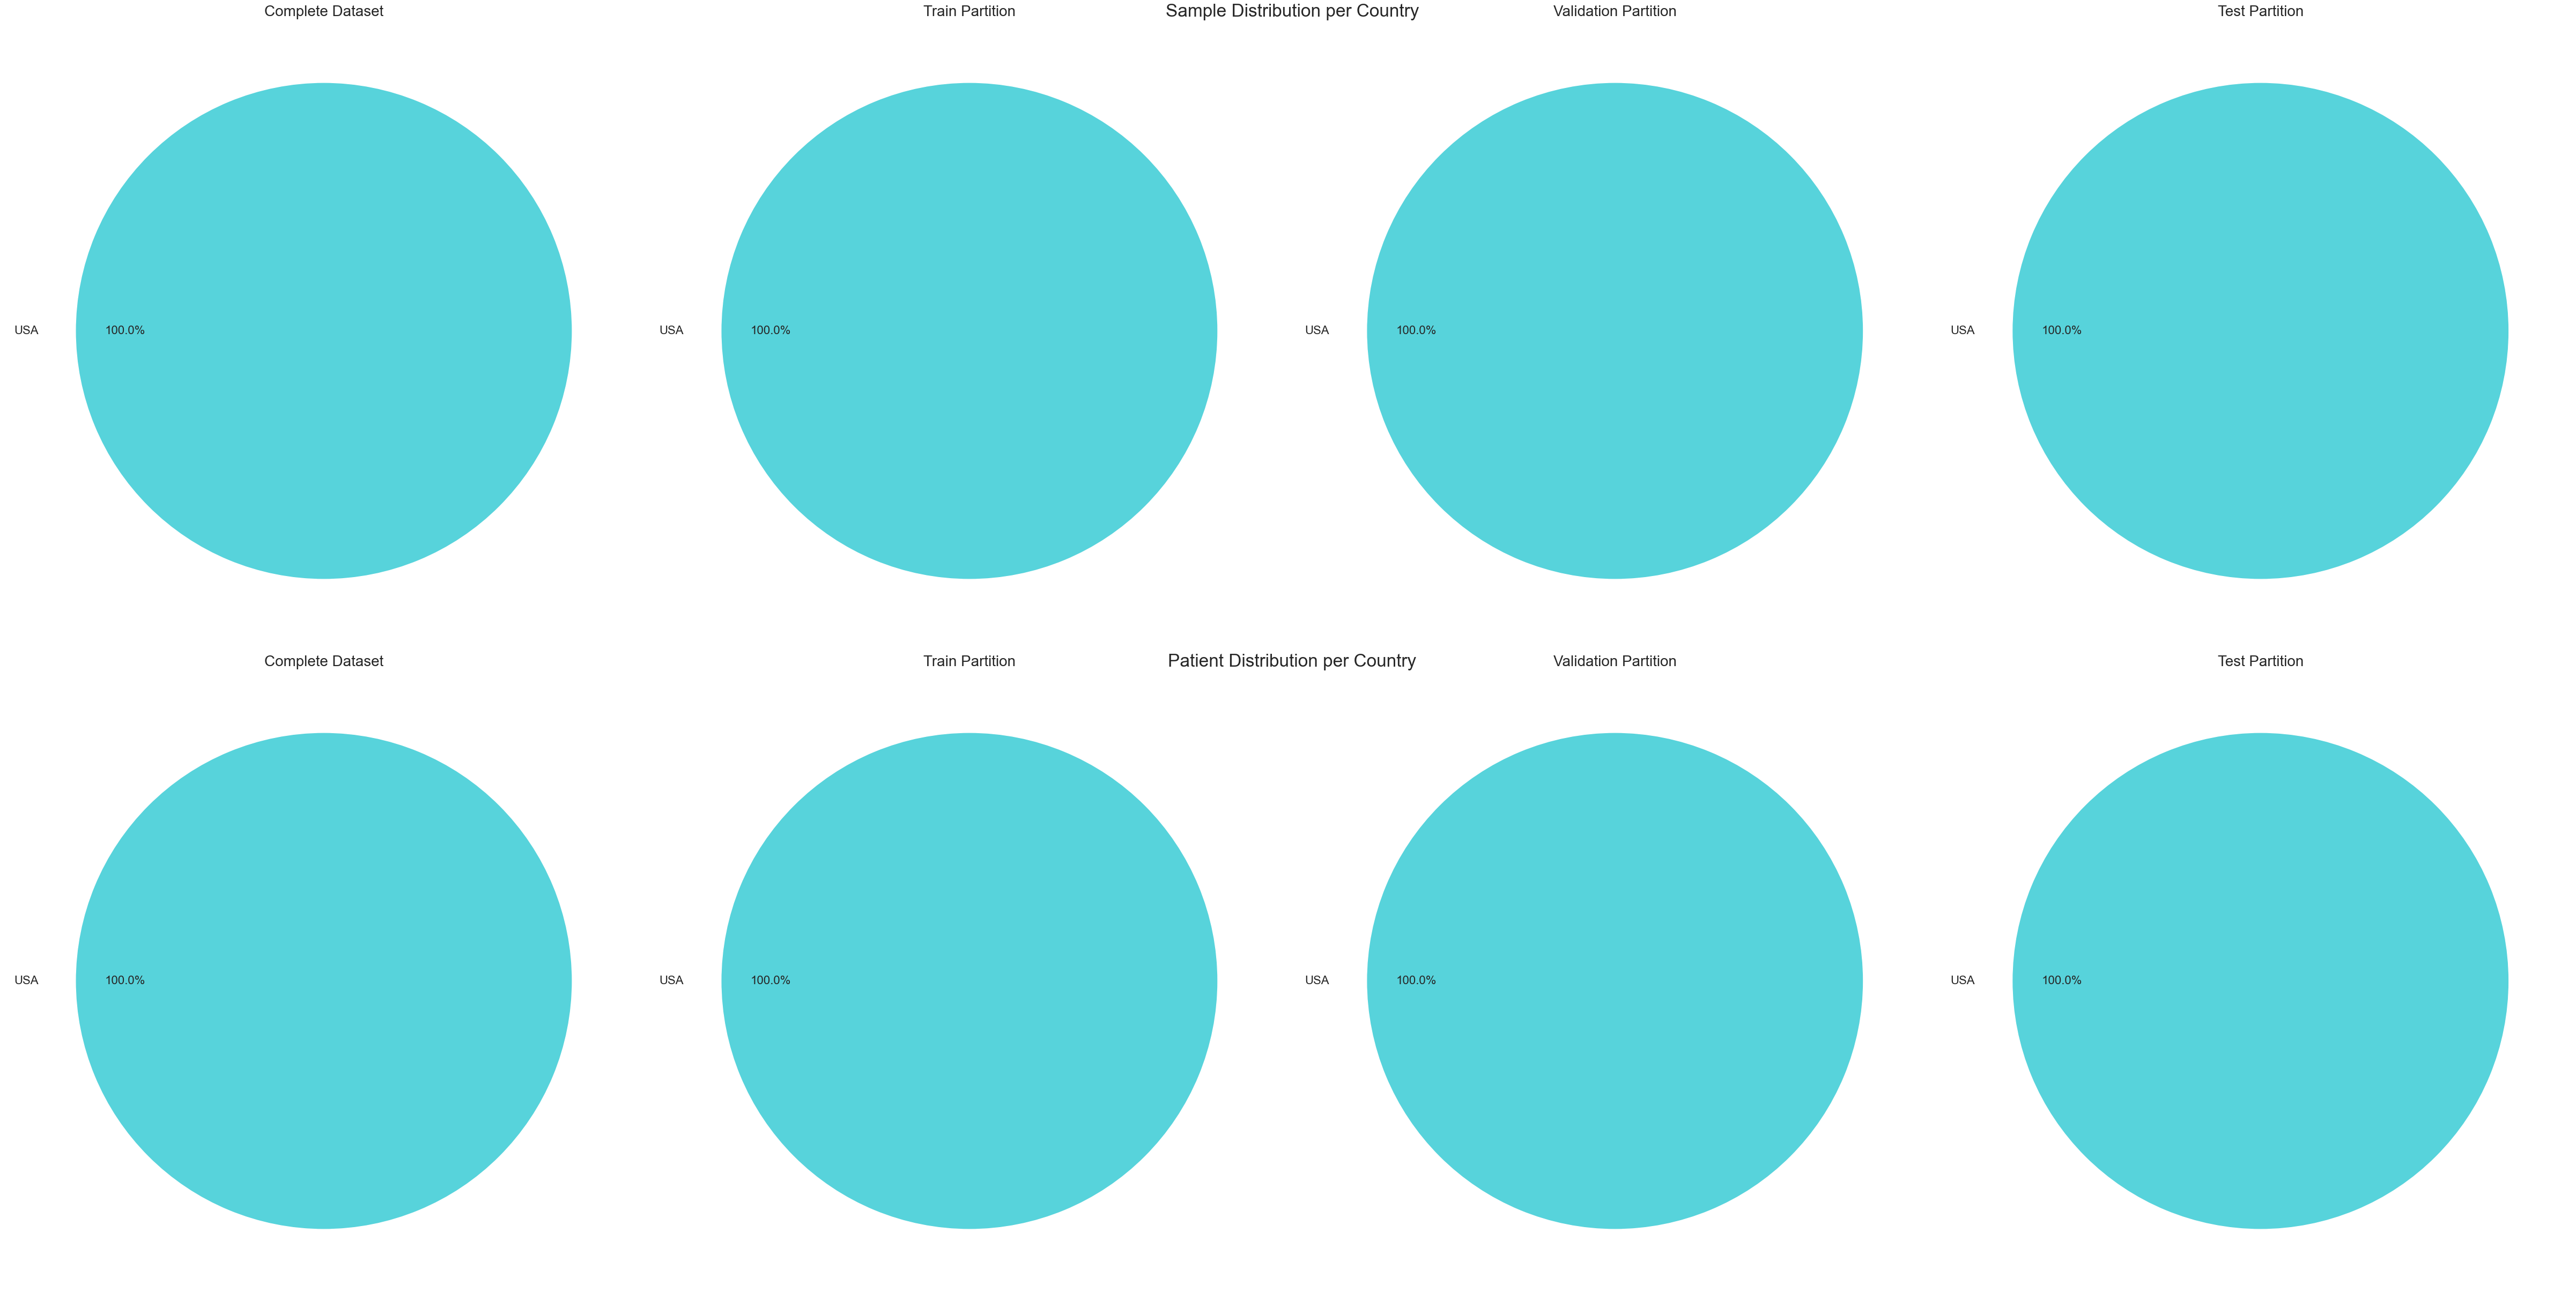

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
France,0,0,0,0
China,0,0,0,0
Iran,0,0,0,0
USA,18460,11071,3658,3731
N/A,0,0,0,0
Australia,0,0,0,0
Italy,0,0,0,0
Algeria,0,0,0,0
Belgium,0,0,0,0


## Partition

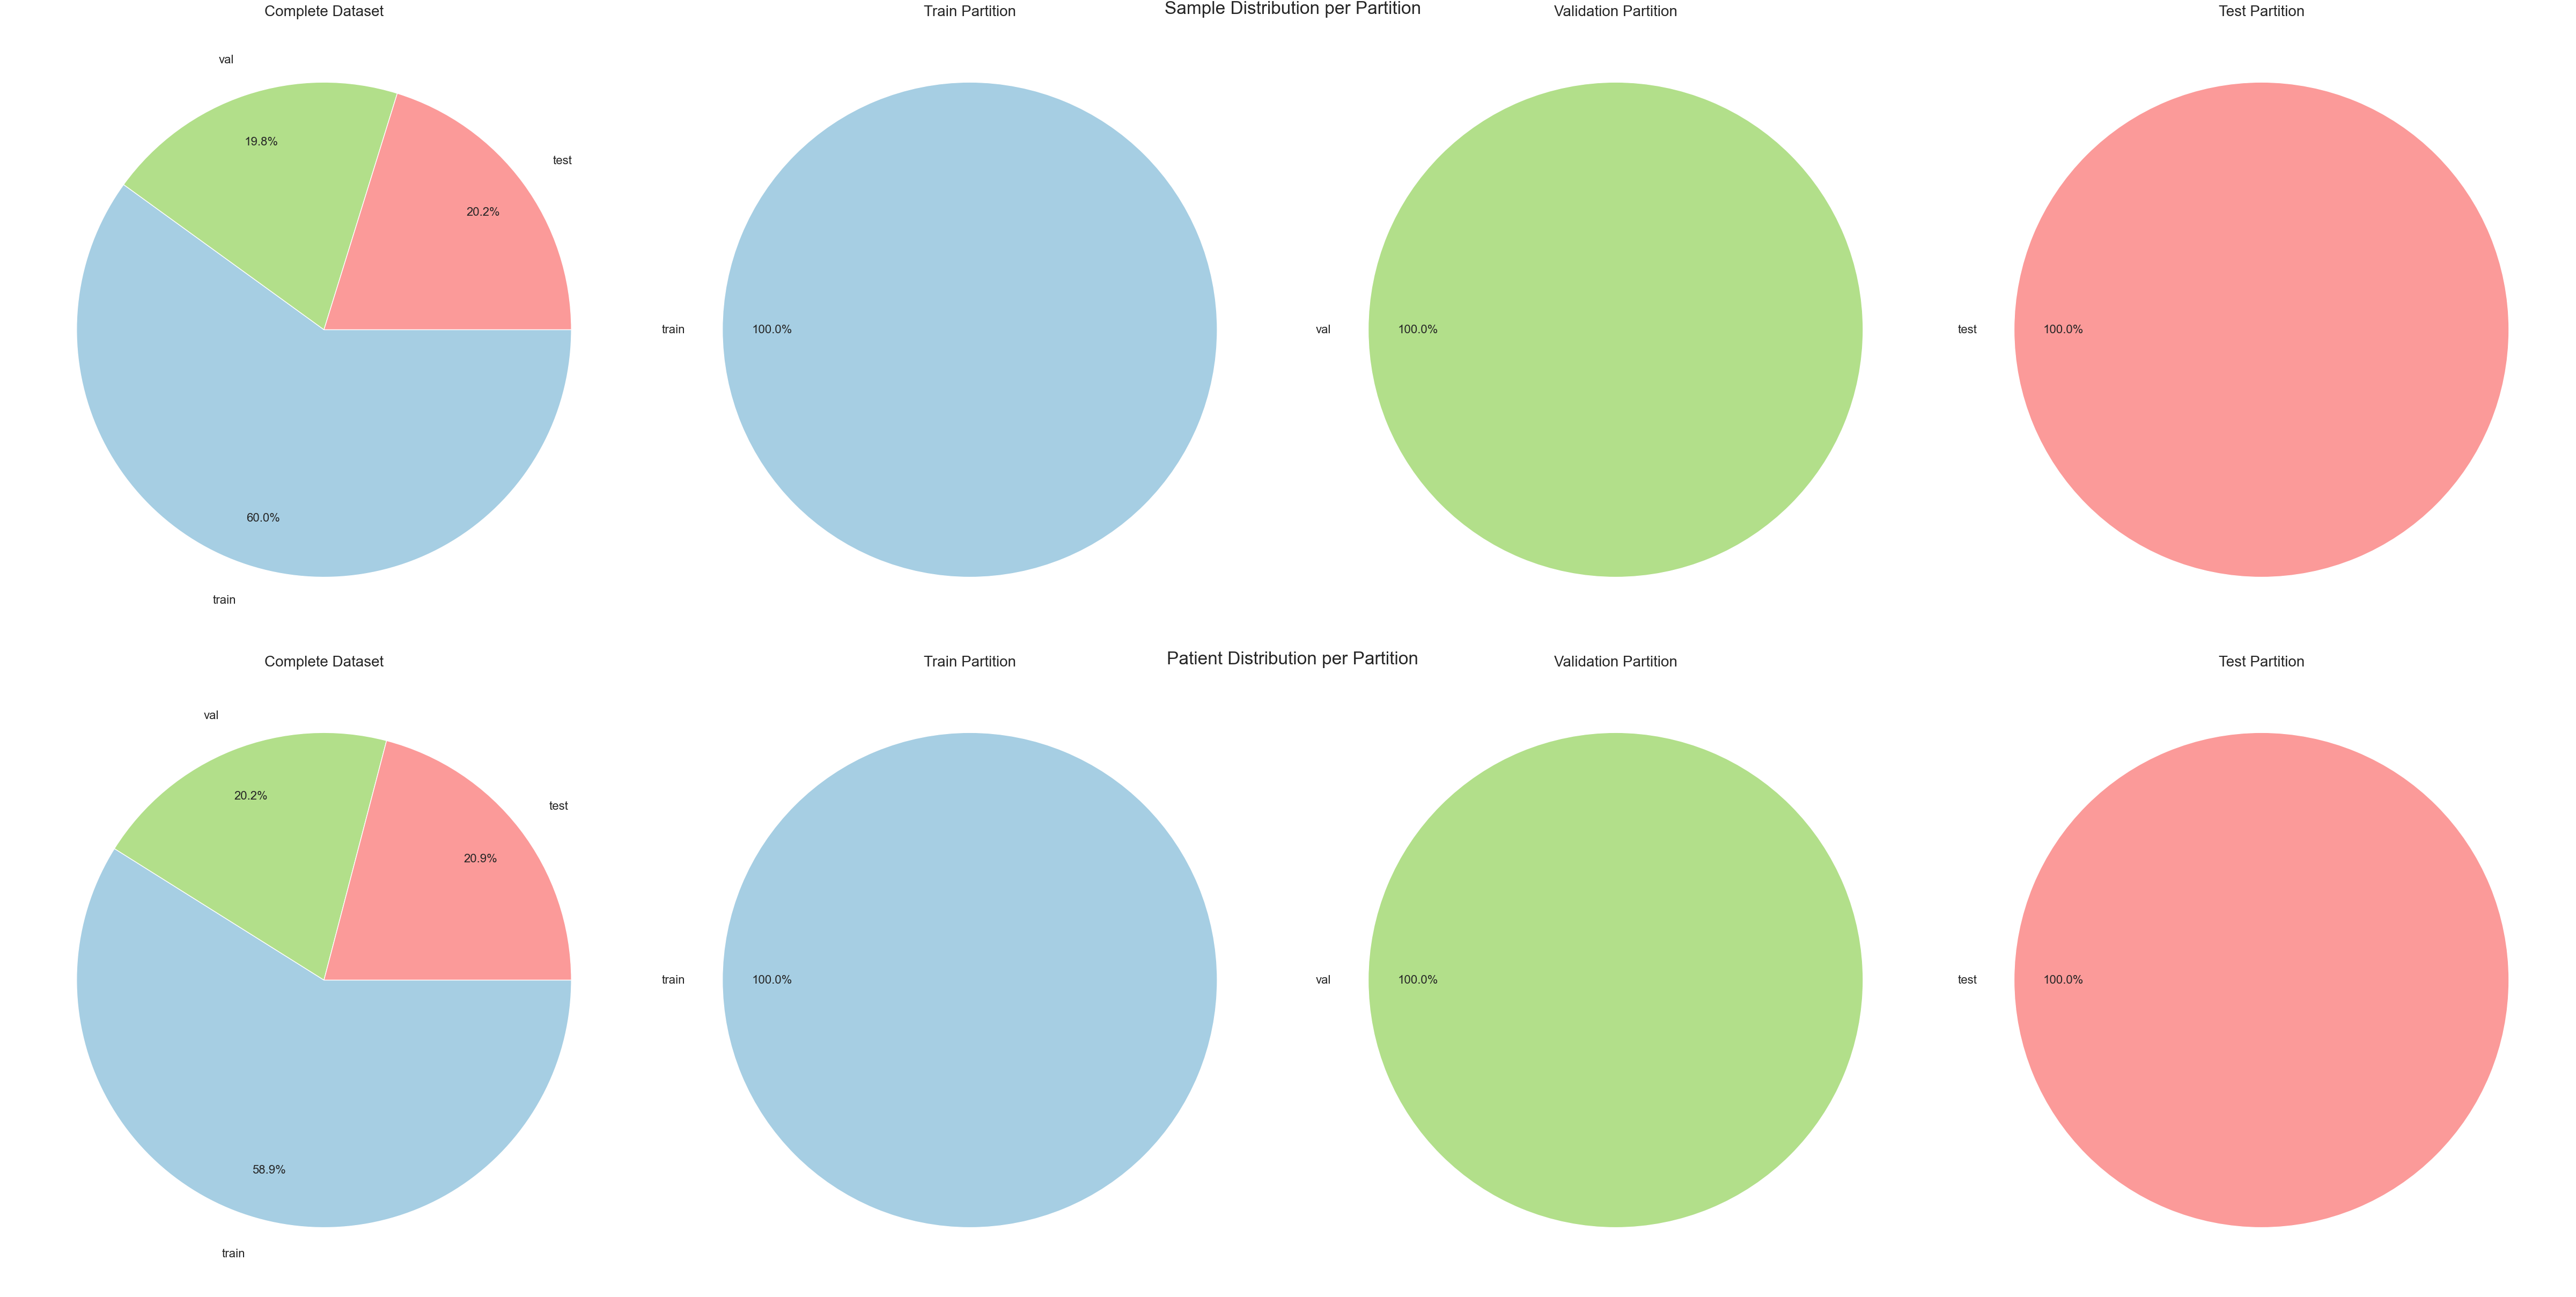

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
test,3731,0,0,3731
train,11071,11071,0,0
val,3658,0,3658,0
SUM,18460,11071,3658,3731
,Dataset,Train,Val,Test
Values,,,,
test,27,0,0,27
train,76,76,0,0
val,26,0,26,0


## Slice Selection

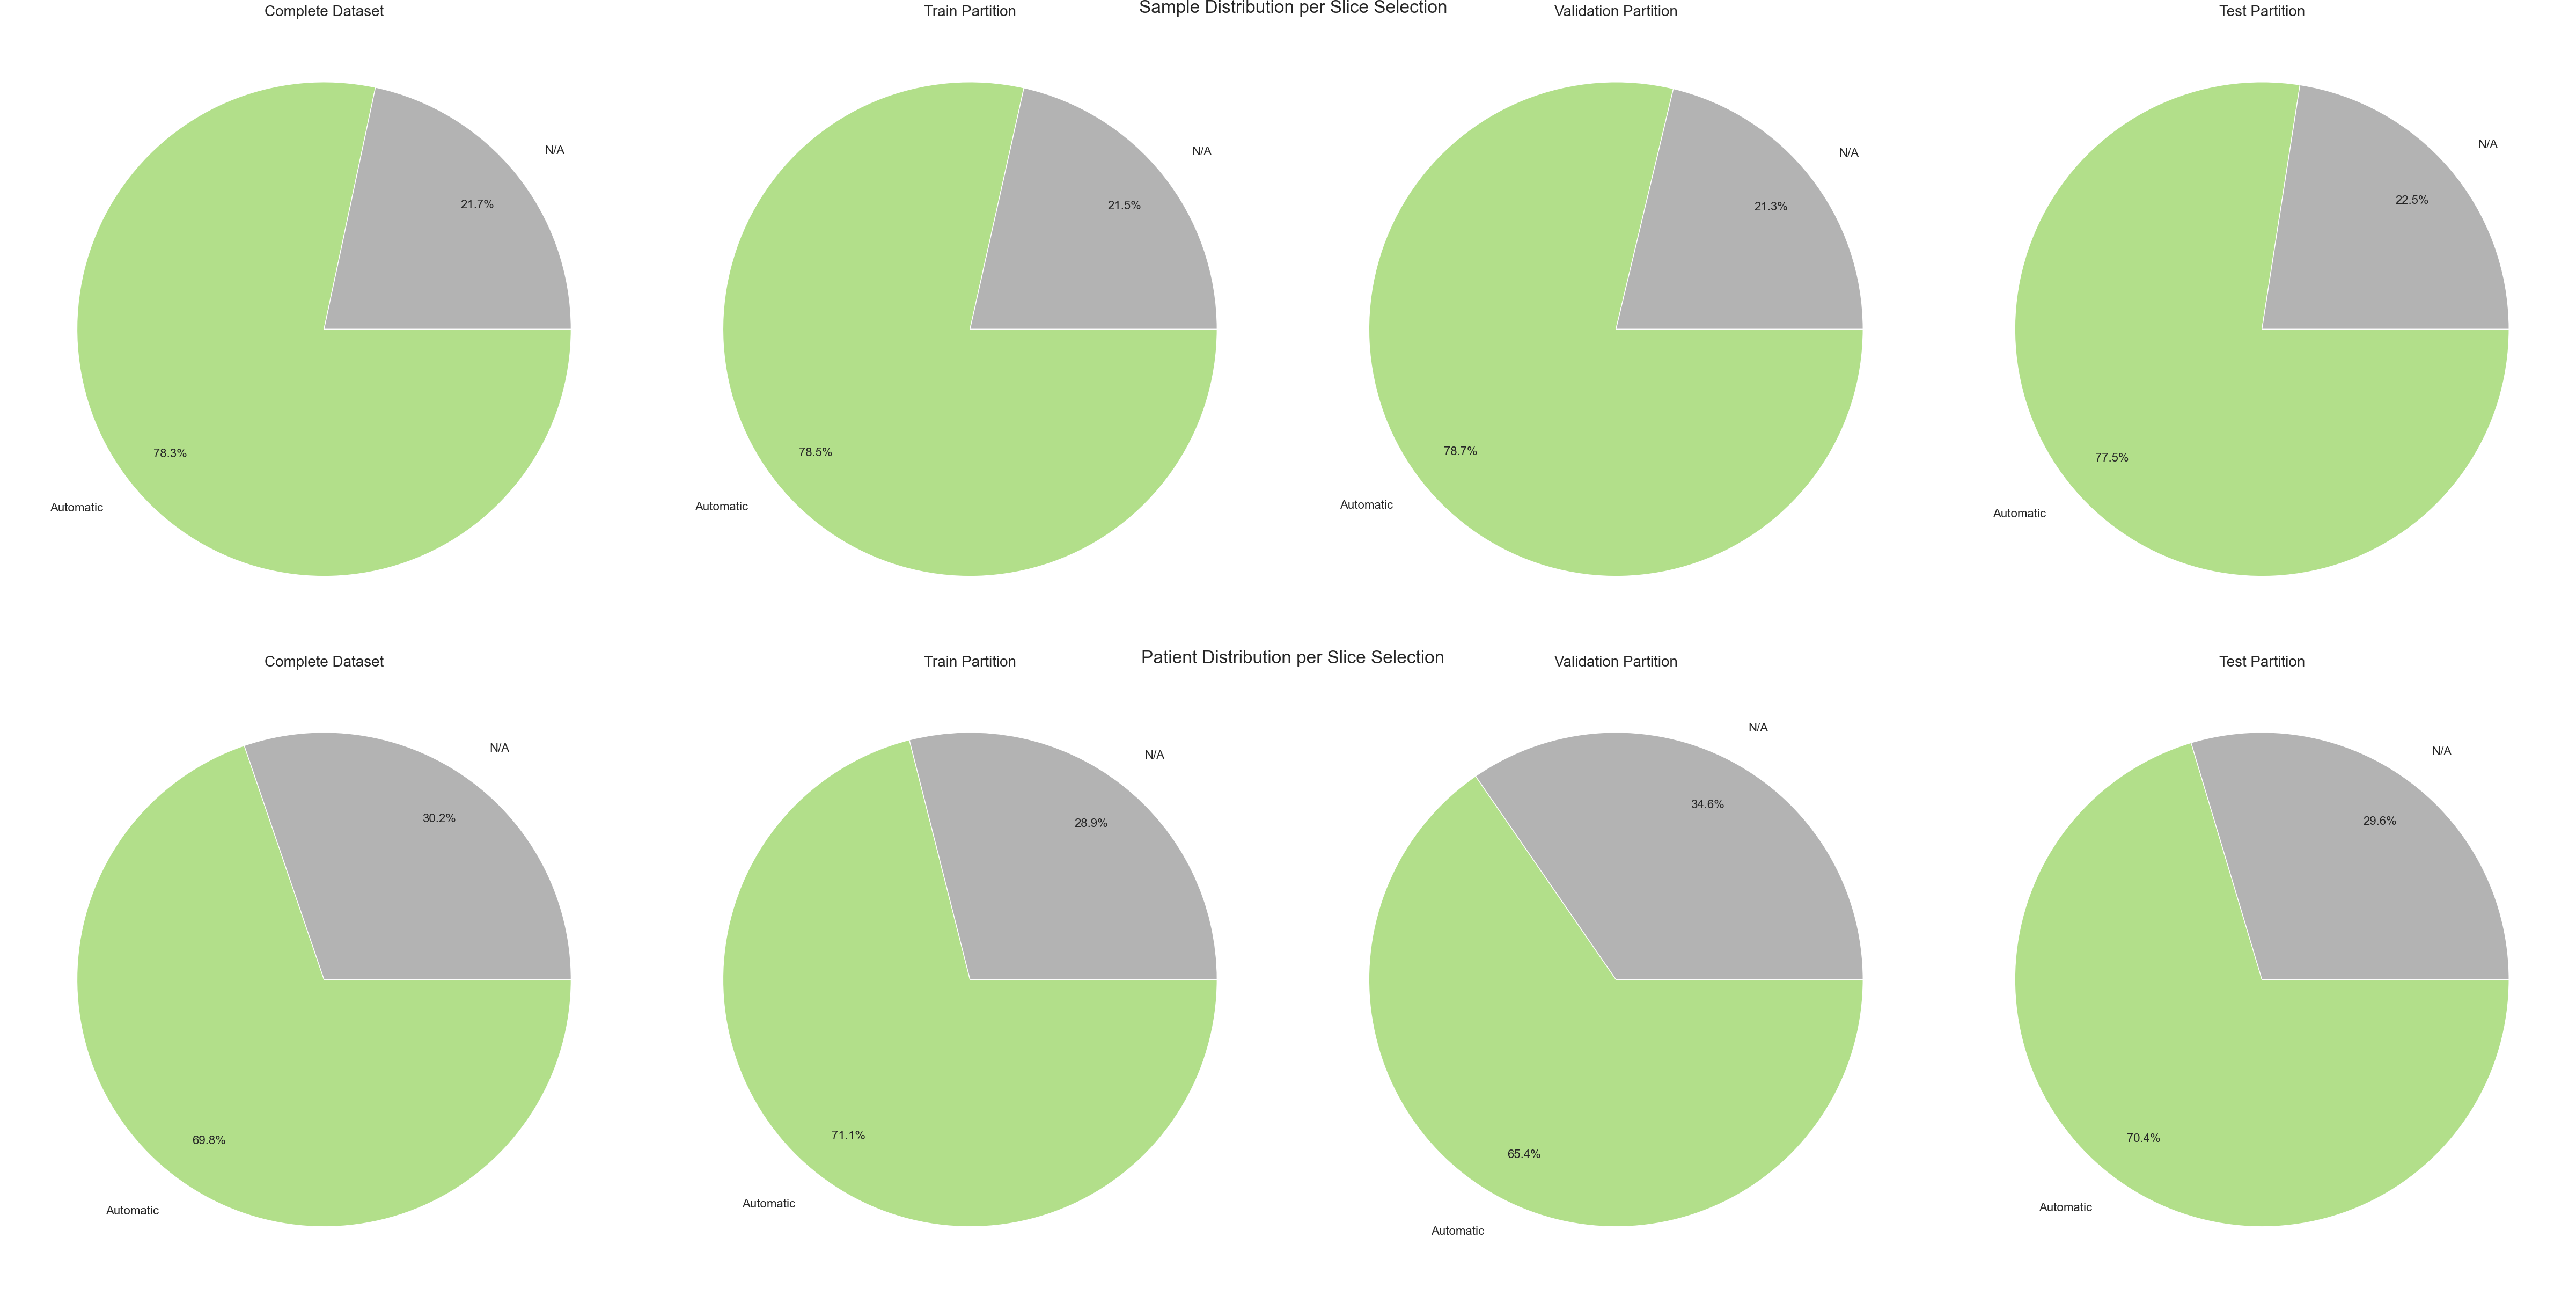

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Automatic,14461,8691,2880,2890
Expert,0,0,0,0
N/A,3999,2380,778,841
Non-expert,0,0,0,0
SUM,18460,11071,3658,3731
,Dataset,Train,Val,Test
Values,,,,
Automatic,90,54,17,19
Expert,0,0,0,0


# Registering Changes

In [21]:
# Reads the LIDC-IDRI csv file
LIDC_metadata_csv_path = os.path.join(metadata_dir, "LIDC-IDRI_data.csv")
LIDC_metadata_df = pd.read_csv(LIDC_metadata_csv_path, sep = ";", na_filter = False, dtype={"age": str})
os.remove(LIDC_metadata_csv_path)

# Reads the Stony Brook csv file
SB_metadata_csv_path = os.path.join(metadata_dir, "Stony Brook_data.csv")
SB_metadata_df = pd.read_csv(SB_metadata_csv_path, sep = ";", na_filter = False, dtype={"age": str})
os.remove(SB_metadata_csv_path)

# Concatenates both dataframes and saves the result as CSV
combined_df = pd.concat([ LIDC_metadata_df, SB_metadata_df ], ignore_index = True )
combined_df.to_csv( os.path.join(metadata_dir, "Comp_LIDC-SB_data.csv"), index = False, sep = ";" )

combined_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality,interpolation,path
0,LIDC-IDRI-0068-1.3.6.1.4.1.14519.5.2.1.6279.60...,LIDC-IDRI-0068,LIDC-IDRI,Normal,USA,N/A,N/A,train,N/A,50,60,457,408,Yes,Axial,CT,3,LIDC-IDRI\train\LIDC-IDRI-0068-1.3.6.1.4.1.145...
1,LIDC-IDRI-0068-1.3.6.1.4.1.14519.5.2.1.6279.60...,LIDC-IDRI-0068,LIDC-IDRI,Normal,USA,N/A,N/A,train,N/A,50,60,457,408,Yes,Axial,CT,4,LIDC-IDRI\train\LIDC-IDRI-0068-1.3.6.1.4.1.145...
2,LIDC-IDRI-0068-1.3.6.1.4.1.14519.5.2.1.6279.60...,LIDC-IDRI-0068,LIDC-IDRI,Normal,USA,N/A,N/A,train,N/A,50,60,458,408,Yes,Axial,CT,2,LIDC-IDRI\train\LIDC-IDRI-0068-1.3.6.1.4.1.145...
3,LIDC-IDRI-0068-1.3.6.1.4.1.14519.5.2.1.6279.60...,LIDC-IDRI-0068,LIDC-IDRI,Normal,USA,N/A,N/A,train,N/A,50,60,458,408,Yes,Axial,CT,4,LIDC-IDRI\train\LIDC-IDRI-0068-1.3.6.1.4.1.145...
4,LIDC-IDRI-0068-1.3.6.1.4.1.14519.5.2.1.6279.60...,LIDC-IDRI-0068,LIDC-IDRI,Normal,USA,N/A,N/A,train,N/A,50,60,458,408,Yes,Axial,CT,4,LIDC-IDRI\train\LIDC-IDRI-0068-1.3.6.1.4.1.145...
